# Exercise 6: Plotting Montlhy Price Fluctuations

### ***Task***: For each company create a plot showing the range of prices for each month and justify the chart selection.

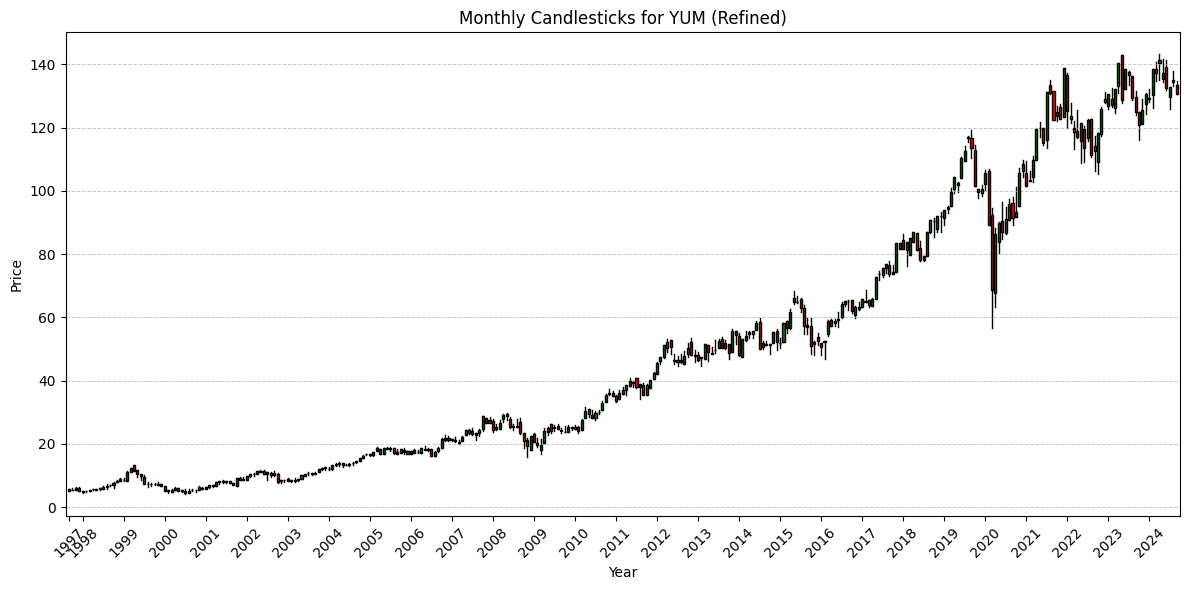

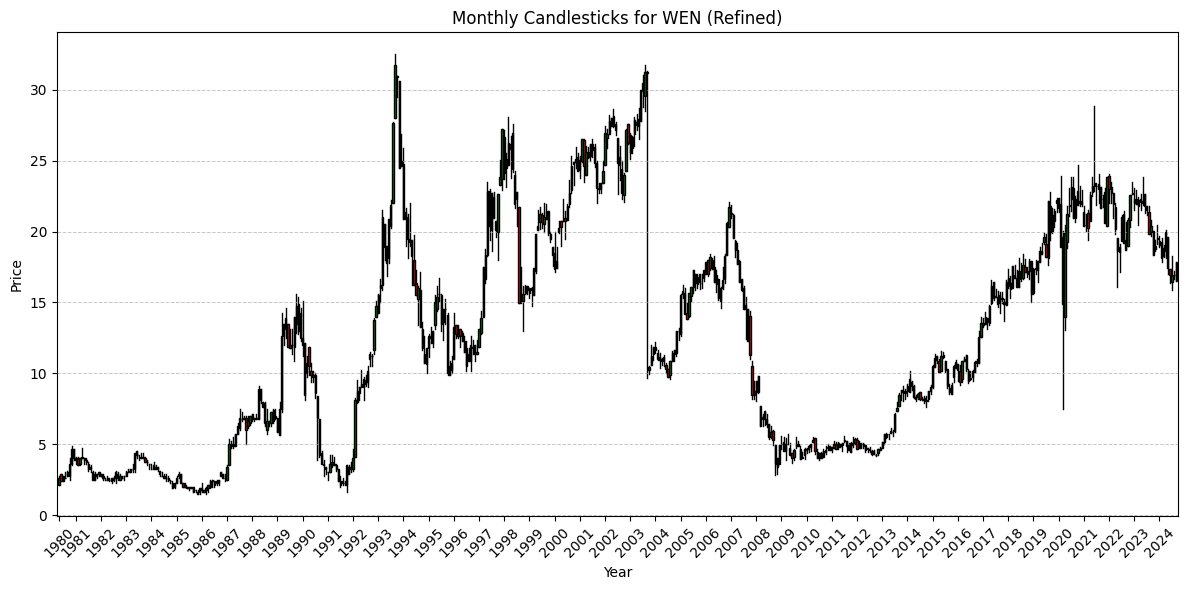

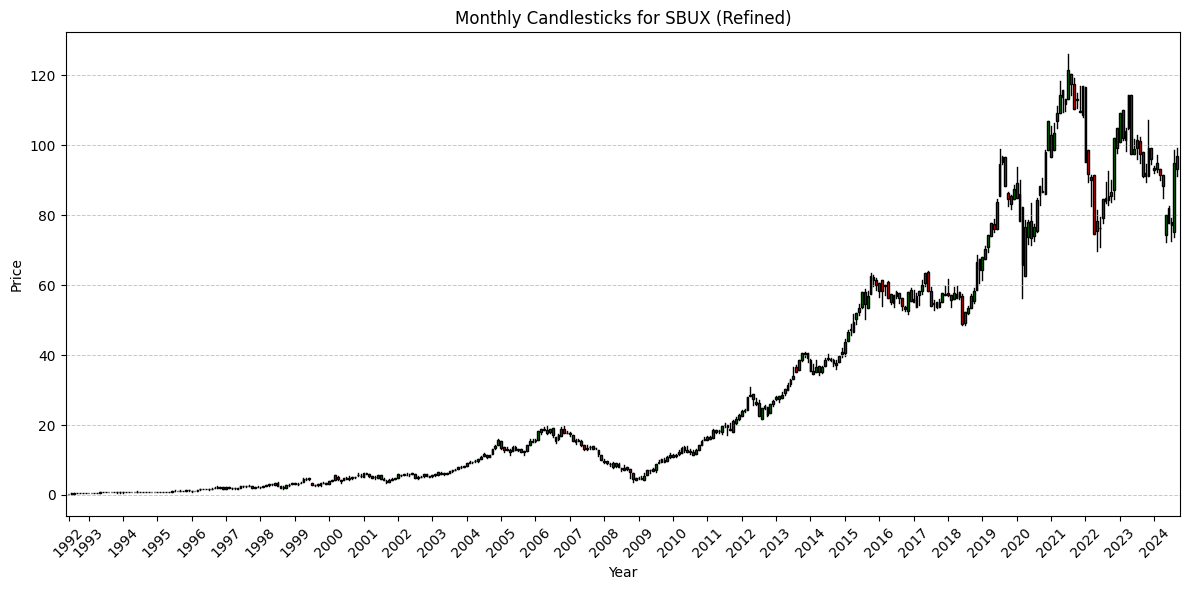

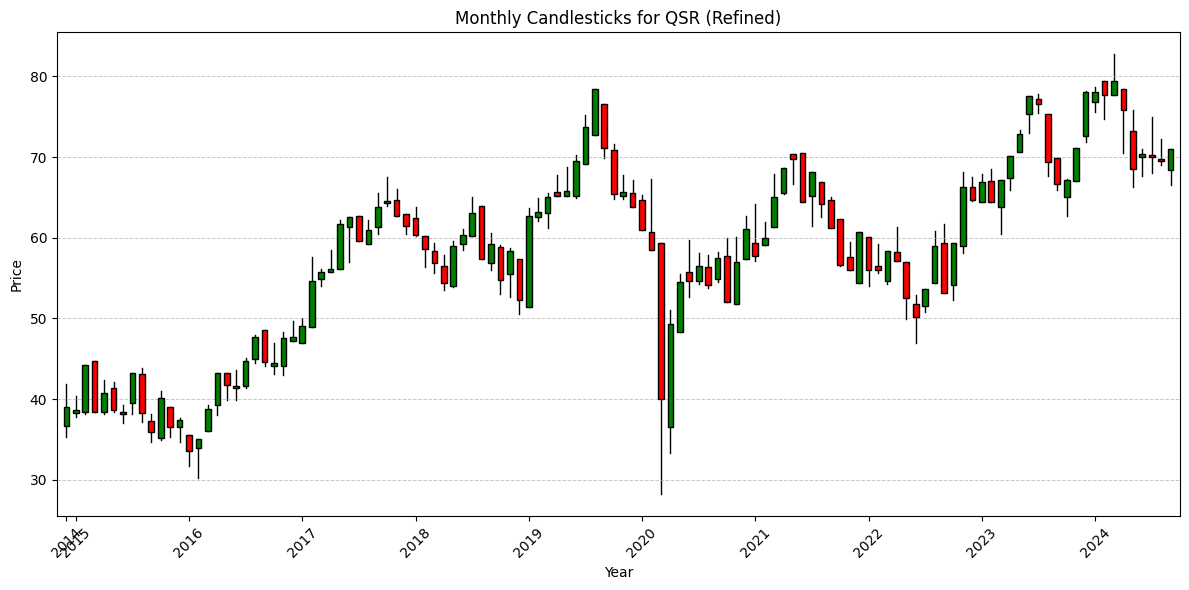

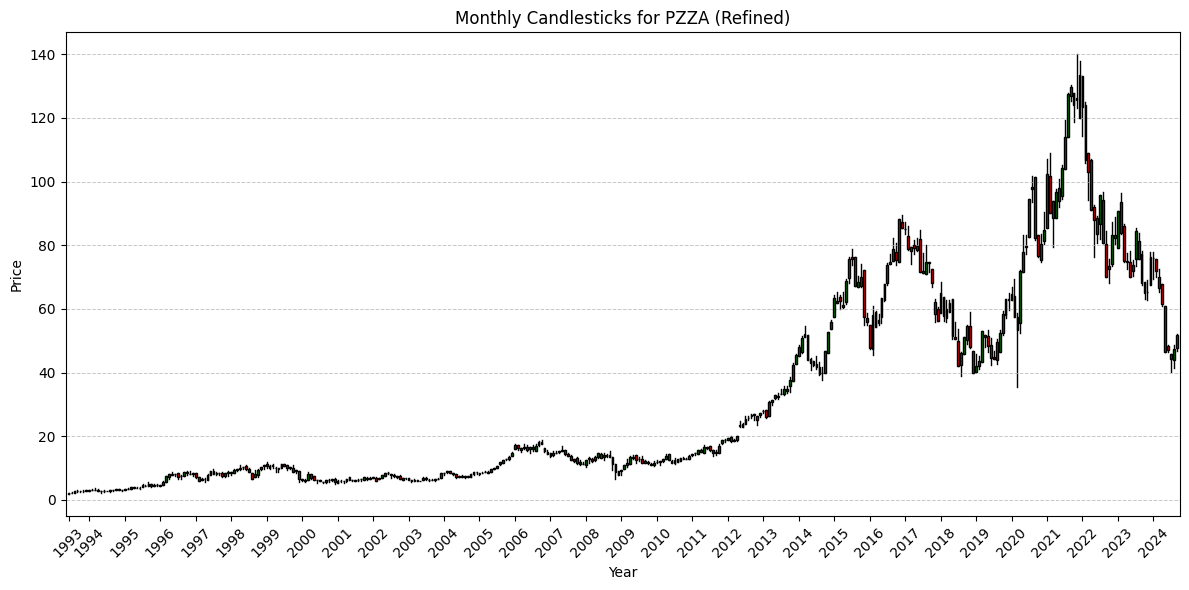

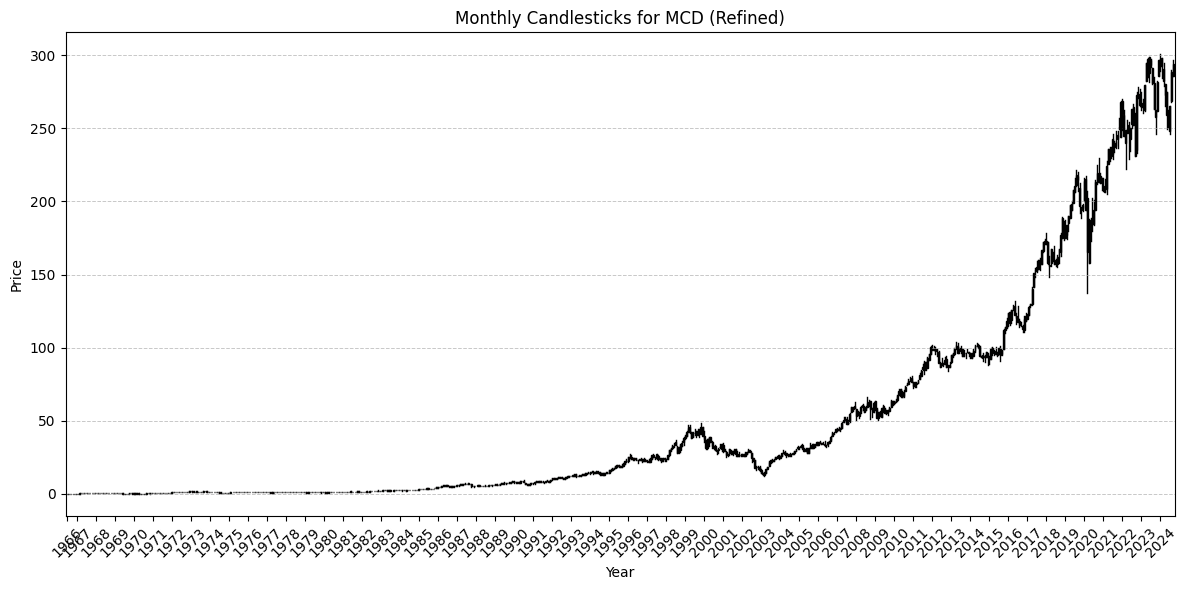

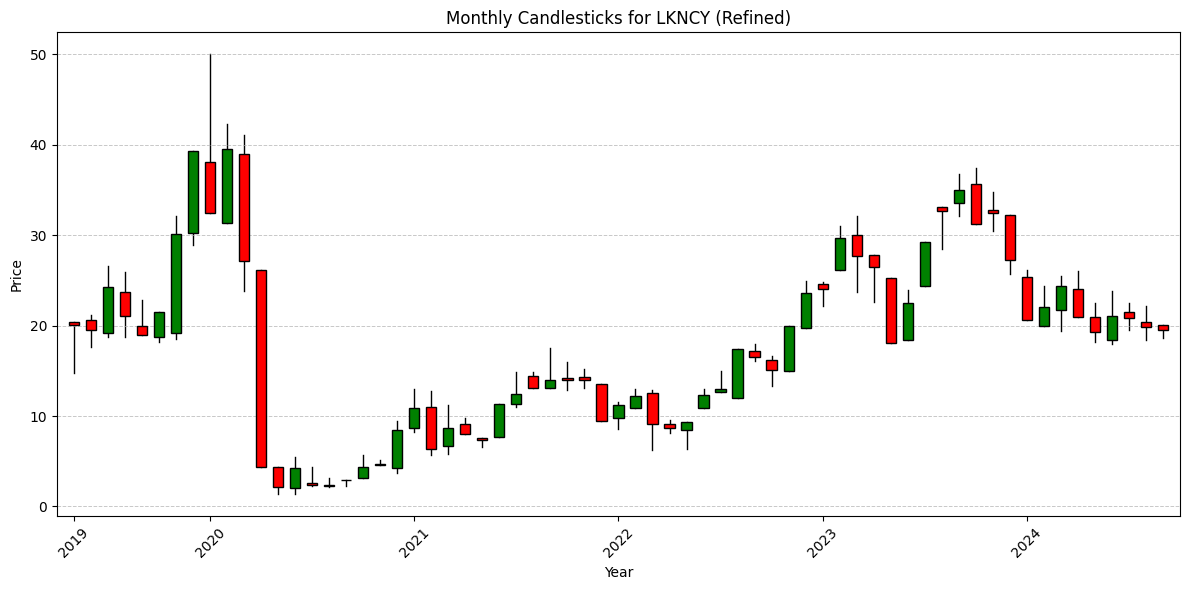

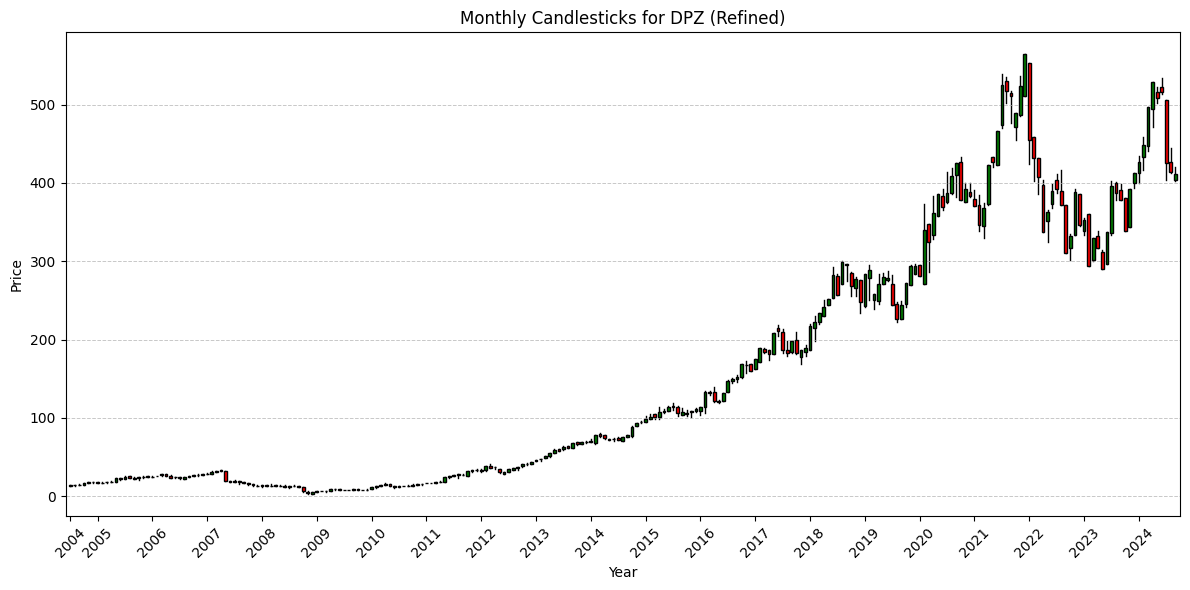

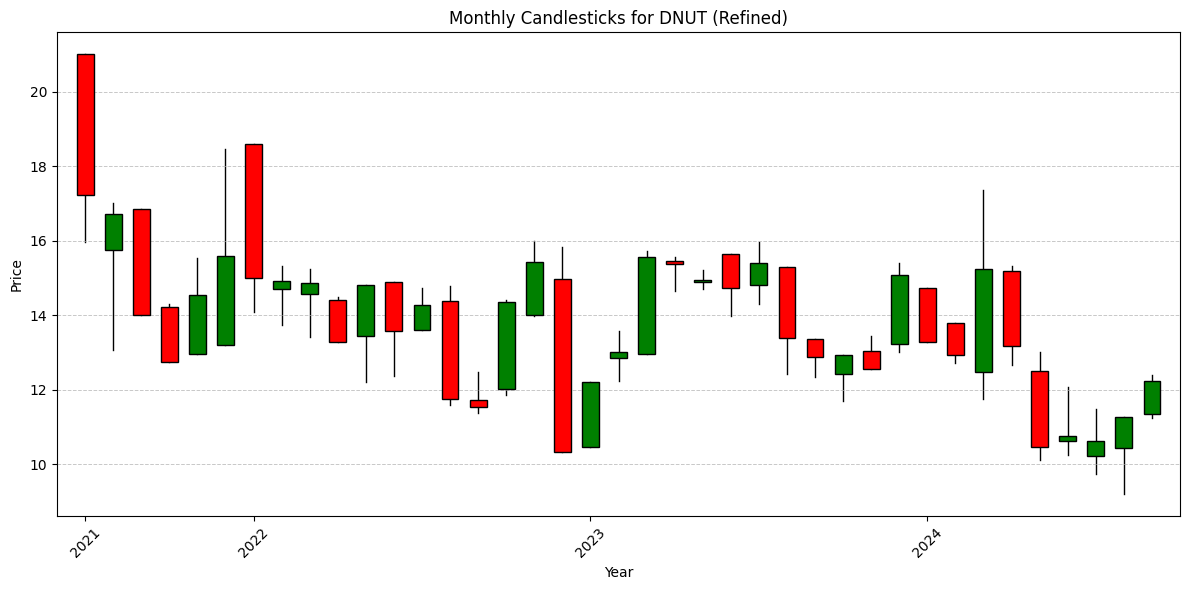

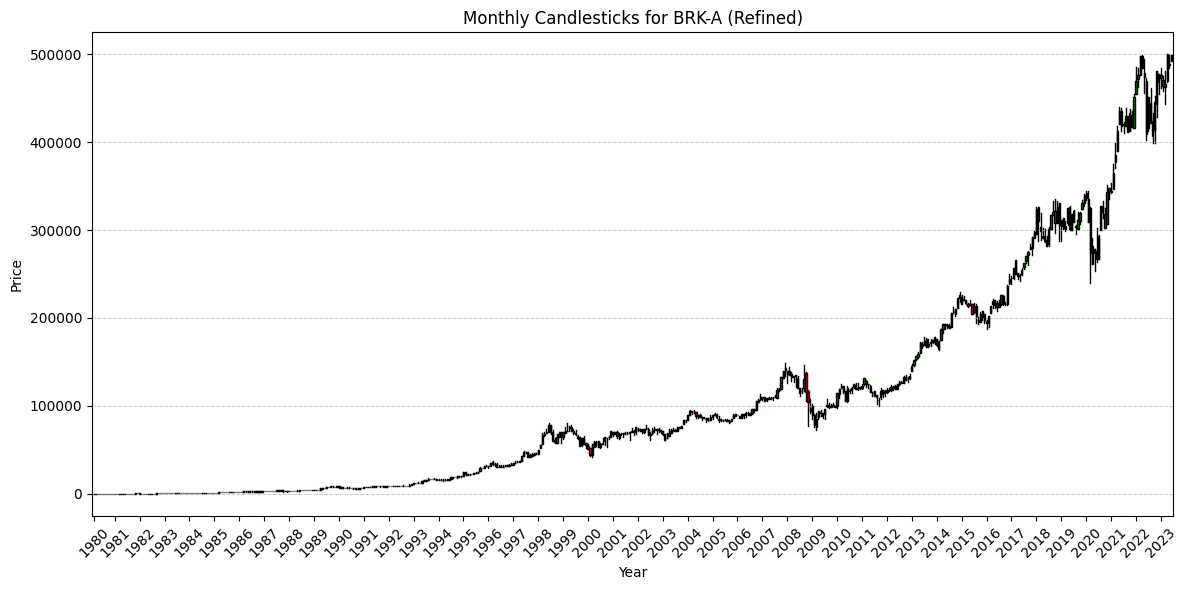

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    "YUM": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/YUM.csv",
    "WEN": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/WEN.csv",
    "SBUX": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/SBUX.csv",
    "QSR": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/QSR.csv",
    "PZZA": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/PZZA.csv",
    "MCD": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/MCD.csv",
    "LKNCY": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/LKNCY.csv",
    "DPZ": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DPZ.csv",
    "DNUT": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DNUT.csv",
    "BRK-A": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/BRK-A.csv"
}

# Define thresholds for outliers
outlier_thresholds = {
    "BRK-A": 1,
    "DNUT": 80,
    "DPZ": 1000,
    "LKNCY": 100,
    "MCD": 400,
    "PZZA": 200,
    "QSR": 300,
    "SBUX": 200,
    "WEN": 80,
    "YUM": 300
}

# Adjusting the candlestick charts to show only the year on the x-axis and refine BRK-A visualization
def plot_candlesticks_refined(data, company_name, threshold):
    # Convert Date to datetime and extract year-month for grouping
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year  # Extract year for simpler x-axis labels
    data['YearMonth'] = data['Date'].dt.to_period('M')
    
    # Remove data points above the threshold
    data = data[data['Close'] <= threshold]
    
    # Group by year-month and calculate open, close, high, and low prices
    monthly_data = data.groupby('YearMonth').agg(
        Open=('Close', 'first'),
        Close=('Close', 'last'),
        High=('Close', 'max'),
        Low=('Close', 'min'),
        Year=('Year', 'first')  # Keep year for x-axis labeling
    ).reset_index()
    
    # Determine colors based on monthly performance
    monthly_data['Color'] = ['green' if close > open_ else 'red' 
                             for open_, close in zip(monthly_data['Open'], monthly_data['Close'])]
    
    # Plot candlesticks
    plt.figure(figsize=(12, 6))
    for i, row in monthly_data.iterrows():
        # Plot wick (high-low) in black
        plt.plot([i, i], [row['Low'], row['High']], color='black', linewidth=1, zorder=1)
        # Plot candle body (open-close) in green/red
        plt.gca().add_patch(plt.Rectangle((i - 0.3, min(row['Open'], row['Close'])),
                                          0.6, abs(row['Close'] - row['Open']),
                                          color=row['Color'], ec='black', zorder=2))
    
    # Formatting the plot
    plt.title(f"Monthly Candlesticks for {company_name} (Refined)")
    plt.xlabel("Year")
    plt.ylabel("Price")
    
    # Simplify x-axis to show only years
    years = monthly_data['Year'].unique()
    year_positions = [monthly_data[monthly_data['Year'] == year].index[0] for year in years]
    plt.xticks(ticks=year_positions, labels=years, rotation=45)
    
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.xlim(-1, len(monthly_data))  # Add some spacing for visual appeal
    plt.tight_layout()
    plt.show()

# Generate the refined candlestick charts
for company, file_path in file_paths.items():
    # Load data
    data = pd.read_csv(file_path)
    if 'Date' not in data.columns or 'Close' not in data.columns:
        print(f"File for {company} is missing 'Date' or 'Close' column.")
        continue
    
    # Apply special handling for BRK-A to make it more appropriate
    threshold = outlier_thresholds[company]
    if company == "BRK-A":
        threshold = 500000  # Assume a realistic high value for BRK-A
    
    plot_candlesticks_refined(data, company, threshold)


### Why Candlesticks? 

We chose **candlestick charts** as our chart selection because they provide the most comprehensive visualization of monthly trading data, offering insights that go beyond simple averages or trends. A candlestick chart conveys multiple layers of information in a single visualization, making it particularly effective for analyzing stock performance over time.

The **color of the candle** immediately indicates whether a stock increased or decreased in value during the month. Specifically, a green candle shows that the stock's value increased (the closing price was higher than the opening price), while a red candle signifies a decrease in value (the closing price was lower than the opening price). This visual distinction allows users to quickly identify positive or negative trends without needing to analyze numerical data.

The **body of the candle** represents the difference between the opening and closing prices for the month. A tall body indicates significant price movement, suggesting a month of strong activity, while a short body reflects relatively stable performance. This feature highlights the degree of change in stock value within a given month.

The **wicks** (also known as shadows) of the candlestick add further detail by showing the stock's high and low prices during the month. The top wick represents the highest price reached, while the bottom wick shows the lowest price. These elements provide critical insights into the volatility of the stock, revealing how much its price fluctuated over the month.

